In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Spotify_Youtube.csv")

## Data Exploration

In [3]:
data.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [4]:
data.dtypes

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [5]:
data.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [6]:
num_data = []
for i in data.columns:
  if data[i].dtypes == "float64":
    num_data.append(i)

In [7]:
data_numbers = data[columns:= num_data]

<Axes: >

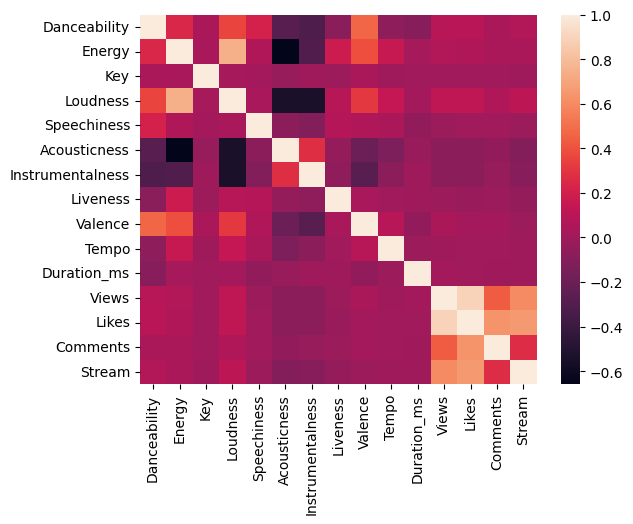

In [8]:
#Correlation plot
sns.heatmap(data_numbers.corr())

## DATA PREPROCESSING

Eliminating unnecessary columns from the dataset for our analysis by removing Url_spotify, Uri, Key, Url_youtube, and Description.

In [9]:
data.drop(columns = ['Url_spotify','Uri','Key','Url_youtube','Description'], inplace=True)

Examining the dataset for the presence of null values and calculate the total count of null values for each column

In [10]:
data.isnull().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              577
dtype: int64

Managing null values in data for improved data quality and analysis

In [11]:
for i in data.columns:
  if data[i].isnull().sum()>0:
    if data[i].dtypes == "float64":
      data[i].fillna(0, inplace = True)

In [12]:
data.isnull().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Title               470
Channel             470
Views                 0
Likes                 0
Comments              0
Licensed            470
official_video      470
Stream                0
dtype: int64

In [13]:
data.dropna(inplace=True)

Eliminating duplicate records in the dataset while retaining the first occurrence of each unique value.

In [14]:
data.duplicated().sum()

5

In [15]:
data.drop_duplicates(keep='first',inplace=True)

In [16]:
data.shape

(20248, 22)

Converting the duration in milliseconds to minutes, facilitating a clearer comprehension and representation of time intervals in a more user-friendly format


In [17]:
data['Duration_ms'].head()

0    222640.0
1    200173.0
2    215150.0
3    233867.0
4    340920.0
Name: Duration_ms, dtype: float64

In [18]:
data['Duration_ms'] = data['Duration_ms']/60000

In [19]:
data['Duration_ms'] = round(data['Duration_ms'],2)

In [20]:
data['Duration_ms'].head()

0    3.71
1    3.34
2    3.59
3    3.90
4    5.68
Name: Duration_ms, dtype: float64

Changing the name of the modified column to "Duration_min" to accurately reflect the conversion from milliseconds to minutes

In [21]:
data.rename(columns = {"Duration_ms":"Duration_min"}, inplace=True)

Eliminatinge track names that are deemed irrelevant and begin with the "?" character.

In [22]:
data["Track"].str.startswith("?").sum()

123

In [23]:
remove = []
for row in range(data.shape[0]):
  try:
    if data.loc[row]["Track"].startswith("?"):
      remove.append(row)
  except:
    continue

In [24]:
remove_rows = data[data["Track"].str.startswith("?")].index

In [25]:
data.drop(index = remove_rows, inplace=True)

In [26]:
data["Track"].str.startswith("?").sum()

0

Computing the Energy to Liveness ratio for each track, quantifying the relationship between energy and liveliness attributes. The resulting ratios are then stored in a column named 'EnergyLiveness'.

In [27]:
data.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_min', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [28]:
data["EnergyLiveness"] = data['Energy']/data['Liveness']

In [29]:
data.columns[-1]

'EnergyLiveness'

Modifing the data type of the 'views' column to float, enabling numerical operations and facilitating its utilization in subsequent analysis or calculations requiring floating-point values

In [30]:
data = data.astype({"Views":"float"})

In [31]:
data.Views.dtypes

dtype('float64')

Analyzing the 'views' and 'stream' columns to determine the dominant platform (YouTube or Spotify) on which a song track was most played.

Creating a new column called 'most_playedon' with values 'Spotify' or 'YouTube' indicating the platform with the highest play count for each song track

In [32]:
for row in range(20723):
  try:
    if data.loc[row]["Stream"]> data.loc[row]["Views"]:
      data.loc[row, "most_playedon"] = "Spotify"
    else:
      data.loc[row,"most_playedon"] = "Youtube"
    #using loc instaed of iloc to avoid copy warning, as this will make changes in the original dataframe
  except KeyError:
    continue

In [33]:
data.most_playedon.value_counts()

Spotify    15245
Youtube     4880
Name: most_playedon, dtype: int64

Exporting the data to a CSV file named "cleaned_dataset.csv"

In [ ]:
data.to_csv("YouTube_Spotify_cleaned.csv", encoding ="utf-8", index=False)

## **Exploratory Data Analysis**

In [34]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [35]:
data.nunique()

Artist               2058
Track               17362
Album               11645
Album_type              3
Danceability          897
Energy               1263
Loudness             9269
Speechiness          1296
Acousticness         3125
Instrumentalness     3982
Liveness             1526
Valence              1290
Tempo               14702
Duration_min          812
Title               18022
Channel              6672
Views               19123
Likes               17830
Comments            10429
Licensed                2
official_video          2
Stream              17979
EnergyLiveness      17317
most_playedon           2
dtype: int64

**DESCRIPTIVE STATISTICS**

In [36]:
@interact
def check(column = list(data.select_dtypes('float64').columns)):
    max = data[column].max()
    min = data[column].min()
    avg = data[column].mean()
    var = data[column].var()
    std = data[column].std()
    percentile1 = data[column].quantile(0.25)
    percentile3 = data[column].quantile(0.95)
    print("Max Value :", max)
    print("Minimum Value :", min)
    print("Average Value :", avg)
    print("Variance :", var)
    print("Standard Deviation :", std)
    print("25 Percentile :", percentile1)
    print("75 Percentile :", percentile3)

interactive(children=(Dropdown(description='column', options=('Danceability', 'Energy', 'Loudness', 'Speechine…

In [37]:
data.nunique()

Artist               2058
Track               17362
Album               11645
Album_type              3
Danceability          897
Energy               1263
Loudness             9269
Speechiness          1296
Acousticness         3125
Instrumentalness     3982
Liveness             1526
Valence              1290
Tempo               14702
Duration_min          812
Title               18022
Channel              6672
Views               19123
Likes               17830
Comments            10429
Licensed                2
official_video          2
Stream              17979
EnergyLiveness      17317
most_playedon           2
dtype: int64

In [38]:
col1_list = ['Views','Likes','Stream','Comments']
col2_list = ['Album_type', 'Licensed','official_video']

In [39]:
@interact

def check(col1=data[col1_list], col2=data[col2_list]):
    # Handle division by zero
    divisor = np.where(data[col2] != 0, data[col2], np.nan)

    x = data[[col2, col1]].groupby([col2]).agg(['min', 'max', 'mean'])
    return x.style.bar(color="lightgrey")

interactive(children=(Dropdown(description='col1', options=('Views', 'Likes', 'Stream', 'Comments'), value='Vi…